In [12]:
from sklearn import tree
import pandas as pd

In [13]:
golf_df = pd.DataFrame()
golf_df['Outlook'] = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 
                     'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
                     'overcast', 'rainy']
golf_df['Temperature'] = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool',
                         'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild']
golf_df['Humidity'] = ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal',
                      'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high']
golf_df['Windy'] = ['false', 'true', 'false', 'false', 'false', 'true', 'true',
                   'false', 'false', 'false', 'true', 'true', 'false', 'true']
golf_df['Play'] = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 
                  'yes', 'yes', 'no']

In [14]:
one_hot_data = pd.get_dummies(golf_df[ ['Outlook', 'Temperature', 'Humidity', 'Windy'] ])
one_hot_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [15]:
clf = tree.DecisionTreeClassifier()
clf_train = clf.fit(one_hot_data, golf_df['Play'])

In [16]:
import dtutils

In [19]:
# fnames is the list of feature names in the order they occur in the data used to train the decision tree classifier
fnames = ['Outlook_overcast', 'Outlook_rainy', 'Outlook_sunny', 
          'Temperature_cool', 'Temperature_hot', 'Temperature_mild',
          'Humidity_high', 'Humidity_normal', 'Windy_false', 'Windy_true']
dtutils.print_dt(clf, feature_names=fnames)

The binary tree structure has 13 nodes (depth=4) and has the following tree structure:
node=0 test node: go to node 1 if Outlook_overcast <= 0.5 else to node 12.
	node=1 test node: go to node 2 if Humidity_normal <= 0.5 else to node 7.
		node=2 test node: go to node 3 if Outlook_rainy <= 0.5 else to node 4.
			node=3 leaf node. [class=no] class_freqs=[3.0,0.0]
			node=4 test node: go to node 5 if Windy_false <= 0.5 else to node 6.
				node=5 leaf node. [class=no] class_freqs=[1.0,0.0]
				node=6 leaf node. [class=yes] class_freqs=[0.0,1.0]
		node=7 test node: go to node 8 if Windy_false <= 0.5 else to node 11.
			node=8 test node: go to node 9 if Outlook_sunny <= 0.5 else to node 10.
				node=9 leaf node. [class=no] class_freqs=[1.0,0.0]
				node=10 leaf node. [class=yes] class_freqs=[0.0,1.0]
			node=11 leaf node. [class=yes] class_freqs=[0.0,3.0]
	node=12 leaf node. [class=yes] class_freqs=[0.0,4.0]



In [20]:
clf.classes_

array(['no', 'yes'], dtype=object)

For each leaf node in the printed representation above, the following information is given:
* class: The class predicted by the classifier
* class_freqs: the frequency counts of samples associated with the node for each class in the order given in `clf.classes_`

Alternative, you can plot the decision tree:
* NOTE: this may not work for the decision tree trained in the assignment question, as that tree is very large.

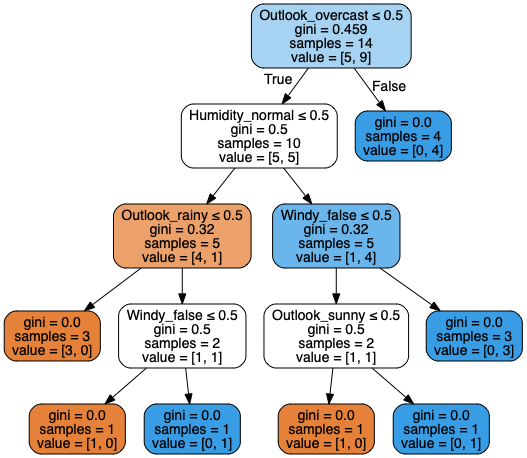

In [18]:
dtutils.plot_dt(clf, feature_names=fnames)